<a href="https://colab.research.google.com/github/ZosoV/aco_random_walk/blob/main/notebooks/display_results_rw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Display Results

In this notebook, you can find some results of our work

In [1]:
COLAB_ENV = False

if COLAB_ENV:
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd /content/gdrive/MyDrive/Proyectos/aco_random_walk/
else:
    #%cd /home/zosov/ACO_Random_Walk
    %cd /home/israel.pineda/oscar/aco_random_walk/

/home/israel.pineda/oscar/aco_random_walk


In [2]:
!ls stuff/results/aco_pp

histories_greedy_params_q_0	      histories_params_proximity_dif_size
histories_levy_greedy_params_omega    histories_params_q_0
histories_levy_proximity_paramas_q_0  histories_proximity_paramas_q_0
histories_params_p		      histories_rw_greedy_params_q_0
histories_params_penalty	      histories_rw_levy_greedy_params_omega
histories_params_penalty_dif_size     histories_rw_levy_proximity_params_q_0
histories_params_penalty_p_0-3	      histories_rw_proximity_params_q_0
histories_params_penalty_reduced      random_walks


In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import glob
import pandas as pd
import seaborn as sns


In [4]:
RESULTS_DIR = "stuff/results/aco_pp"
SAVE_DIR = "stuff/results/plots"
EXPERIMENT_FILE = "stuff/experiments/rw_experiments_1.xlsx"

In [5]:
#@title Handy Functions    
def plot_many_distances(data, x_values = [], legend_labels = [], 
                        legend_title = "var params",  title = "", 
                        save = False , name2save = "default",
                        ylim = None, list_x = None):

  markers = ['o','s','v','D','x','+','p','H','*','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

  # title = 'Average Distance vs Iterations \n' + title
  figure(figsize=(6, 5))#, dpi=80)
  plt.title(title)
  
  i = 0
  for label, distances in zip(legend_labels, data):
    print(f"min dist: {np.amin(distances)}")
    plt.plot(x_values, distances, "-", label = str(label), marker = markers[i])
    i += 1

  plt.legend(title=legend_title)
  if ylim is not None:
    plt.ylim(ylim[0], ylim[1])
  if save: plt.savefig(os.path.join(SAVE_DIR,name2save + ".eps"), format='eps')

  plt.show()
  plt.close()
    
#@title Handy Functions    
def plot_many_distances_ax(ax, list_distances, legend_labels, 
                        legend_title = "var params",  title = "",
                        set_ylabel = None,
                        set_xlabel = None,
                        ylim = None,
                        disable_y_tick = False,
                        optimal_distance = None):
  #ax.grid(axis = 'y')
  list_iterations = np.arange(0, len(list_distances[0]))

  #title = r'Average Distance $\langle x \rangle$ vs Iterations'+' \n' + title
  
  #figure(figsize=(6, 5))#, dpi=80)
  ax.set_title(title)
  
  for label, distances in zip(legend_labels, list_distances):
    print(f"min dist: {np.amin(distances)}")
    ax.plot(list_iterations, distances, "-", label = str(label))
  if optimal_distance is not None:
      ax.plot(list_iterations, [optimal_distance] * len(list_iterations), "b--",linewidth=1.0, label = "optimal distance")
  
  if set_ylabel is not None:
      ax.set_ylabel(set_ylabel, rotation=0, labelpad=10)
  if set_xlabel is not None:
      ax.set_xlabel(set_xlabel)
  if disable_y_tick:
      ax.set_yticks([])
        
  legend = ax.legend(title=legend_title, ncol=2, loc = 'upper right')
  legend.get_frame().set_alpha(None)
  legend.get_frame().set_facecolor((1, 1, 1, 0.1))
  if ylim is not None:
    ax.set_ylim(ylim[0], ylim[1])
    

## Plot Greedy Random Walk -> Vary $q_0$ and advantage

In [6]:
sheet_name = "rw_greedy_params_q_0"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=sheet_name).sort_values(['advantage','q_0'])
params.head()

,type,size,n_rw,advantage,q_0
0,greedy,50,10000,2.0,0.0
1,greedy,50,10000,2.5,0.0
2,greedy,50,10000,3.0,0.0
3,greedy,50,10000,2.0,0.1
4,greedy,50,10000,2.5,0.1


In [7]:
!ls $RESULTS_DIR/histories_rw_greedy_params_q_0

history_exp_00.npy  history_exp_05.npy	history_exp_10.npy  history_exp_15.npy
history_exp_01.npy  history_exp_06.npy	history_exp_11.npy  history_exp_16.npy
history_exp_02.npy  history_exp_07.npy	history_exp_12.npy  history_exp_17.npy
history_exp_03.npy  history_exp_08.npy	history_exp_13.npy
history_exp_04.npy  history_exp_09.npy	history_exp_14.npy


In [8]:
# plot histories_params_p
EXECUTIONS = 10000


res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append([arr['mean'], arr['std'], arr['sem']])

#temp_list
data = np.array(temp_list)
data.shape

(18, 3)

In [9]:
val1_name = 'advantage'
val2_name = 'q_0'
temp1 = []
for i in params[val1_name].unique():
    temp2 = []
    for j in params[val2_name].unique():
        temp_df = params[(params[val2_name] == j) & (params[val1_name] == i)]
        row_id = temp_df.index[0]
        temp2.append(data[row_id,0])
    temp1.append(temp2)
    
test_data = np.array(temp1)

min dist: 106.0662
min dist: 104.9948
min dist: 104.1688


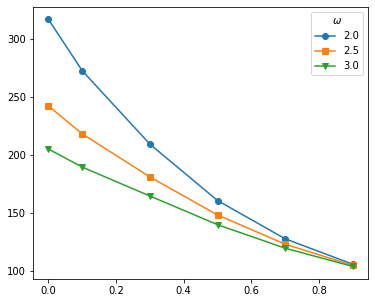

In [10]:
plot_many_distances(data = test_data, 
                    x_values = params[val2_name].unique(), 
                    legend_labels = params[val1_name].unique(),
                    legend_title = r'$\omega$')

In [11]:
# plot histories_params_p
EXECUTIONS = 10000


res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append(arr['distances'])

#temp_list
data = np.array(temp_list)
data.shape

#mean, std, sem

(18, 10000)

In [12]:
frames = []

for i in range(len(data)):
    tmp_df = pd.DataFrame(data[i], columns =['distance'])
    tmp_df['advantage'] = params.loc[i]['advantage']
    tmp_df['q_0'] = params.loc[i]['q_0']
    tmp_df.head()
    frames.append(tmp_df)
    
test_df = pd.concat(frames)
test_df.head()

,distance,advantage,q_0
0,476.0,2.0,0.0
1,322.0,2.0,0.0
2,422.0,2.0,0.0
3,314.0,2.0,0.0
4,262.0,2.0,0.0


Text(0, 0.5, '$\\langle x \\rangle$')

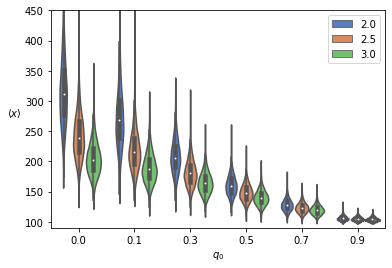

In [13]:
ax = sns.violinplot(x="q_0", y="distance", hue="advantage",
                    data=test_df, palette="muted")#, split=True)
ax.set_ylim(90, 450)
ax.set(xlabel=r'$q_0$')
ax.legend(title="")
ax.set_ylabel(r"$\langle x \rangle$", rotation=0, labelpad=10)

## Plot Proximity Random Walk -> Vary $q_0$ and proximity

In [14]:
sheet_name = "rw_proximity_params_q_0"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=sheet_name).sort_values(['q_0'])
params.head()

,type,size,n_rw,proximity,q_0
0,proximity,50,10000,proximity_1,0.0
1,proximity,50,10000,proximity_2,0.0
2,proximity,50,10000,proximity_1,0.1
3,proximity,50,10000,proximity_2,0.1
4,proximity,50,10000,proximity_1,0.3


In [15]:
# plot histories_params_p
EXECUTIONS = 10000


res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append([arr['mean'], arr['std'], arr['sem']])

#temp_list
data = np.array(temp_list)
data.shape

#mean, std, sem

(12, 3)

In [16]:
val1_name = 'proximity'
val2_name = 'q_0'
temp1 = []
for i in params[val1_name].unique():
    temp2 = []
    for j in params[val2_name].unique():
        temp_df = params[(params[val2_name] == j) & (params[val1_name] == i)]
        row_id = temp_df.index[0]
        temp2.append(data[row_id,0])
    temp1.append(temp2)
    
test_data = np.array(temp1)

min dist: 108.1894
min dist: 108.329


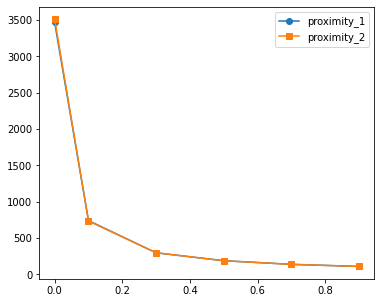

In [17]:
plot_many_distances(data = test_data, 
                    x_values = params[val2_name].unique(), 
                    legend_labels = params[val1_name].unique(),
                    legend_title = '')

In [18]:
val1_name = 'q_0'
val2_name = 'proximity'
temp1 = []
for i in params[val1_name].unique():
    temp2 = []
    for j in params[val2_name].unique():
        temp_df = params[(params[val2_name] == j) & (params[val1_name] == i)]
        row_id = temp_df.index[0]
        temp2.append(data[row_id,0])
    temp1.append(temp2)
    
test_data = np.array(temp1)

In [19]:
# plot histories_params_p
EXECUTIONS = 10000


res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append(arr['distances'])

#temp_list
data = np.array(temp_list)
data.shape

#mean, std, sem

(12, 10000)

In [20]:
frames = []

for i in range(len(data)):
    tmp_df = pd.DataFrame(data[i], columns =['distance'])
    tmp_df['proximity'] = params.loc[i]['proximity']
    tmp_df['q_0'] = params.loc[i]['q_0']
    tmp_df.head()
    frames.append(tmp_df)
    
test_df = pd.concat(frames)
test_df.head()

,distance,proximity,q_0
0,1966.0,proximity_1,0.0
1,1822.0,proximity_1,0.0
2,3716.0,proximity_1,0.0
3,3722.0,proximity_1,0.0
4,3572.0,proximity_1,0.0


Text(0, 0.5, '$\\langle x \\rangle$')

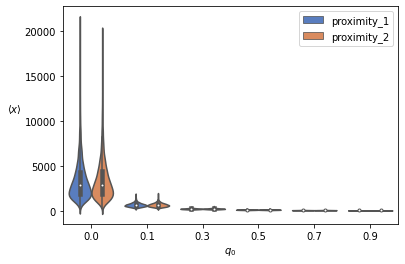

In [21]:
ax = sns.violinplot(x="q_0", y="distance", hue="proximity",
                    data=test_df, palette="muted")#, split=True)
#ax.set_ylim(90, 450)
ax.set(xlabel=r'$q_0$')
ax.legend(title="")
ax.set_ylabel(r"$\langle x \rangle$", rotation=0, labelpad=10)

In [ ]:
# TODO: probarle con escala logaritmica 
# Check table

## Combination

In [8]:
# plot histories_params_p
sheet_name = "rw_greedy_params_q_0"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=sheet_name)
params.head()

res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append([arr['mean'], arr['std'], arr['sem']])

#temp_list
data = np.array(temp_list)
data.shape

#mean, std, sem

(18, 3)

In [9]:
val1_name = 'advantage'
val2_name = 'q_0'
temp1 = []
for i in params[val1_name].unique():
    temp2 = []
    for j in params[val2_name].unique():
        temp_df = params[(params[val2_name] == j) & (params[val1_name] == i)]
        row_id = temp_df.index[0]
        temp2.append(data[row_id,0])
    temp1.append(temp2)
    
test_data = np.array(temp1)
test_data

array([[316.806 , 272.5928, 209.4202, 160.9008, 127.9744, 106.0662],
       [242.2852, 218.238 , 181.2306, 148.465 , 123.361 , 104.9948],
       [205.2216, 189.6516, 164.8052, 140.1148, 119.8692, 104.1688]])

In [10]:
legend_labels = [ f"greedy $\omega = $ {i}" for i in params[val1_name].unique()]
legend_labels

['greedy $\\omega = $ 2.0',
 'greedy $\\omega = $ 2.5',
 'greedy $\\omega = $ 3.0']

In [11]:
# plot histories_params_p
sheet_name = "rw_proximity_params_q_0"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=sheet_name)
params.head()

res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append([arr['mean'], arr['std'], arr['sem']])

#temp_list
data = np.array(temp_list)
data.shape


(12, 3)

In [12]:
val1_name = 'proximity'
val2_name = 'q_0'
temp1 = []
for i in params[val1_name].unique():
    temp2 = []
    for j in params[val2_name].unique():
        temp_df = params[(params[val2_name] == j) & (params[val1_name] == i)]
        row_id = temp_df.index[0]
        temp2.append(data[row_id,0])
    temp1.append(temp2)
    
test_data2 = np.array(temp1)
test_data2

array([[3468.218 ,  739.3348,  295.666 ,  187.3082,  137.0352,  108.1894],
       [3510.6074,  733.2034,  296.6062,  187.008 ,  136.935 ,  108.329 ]])

In [13]:
plot_data = np.concatenate([test_data,test_data2])
plot_data

array([[ 316.806 ,  272.5928,  209.4202,  160.9008,  127.9744,  106.0662],
       [ 242.2852,  218.238 ,  181.2306,  148.465 ,  123.361 ,  104.9948],
       [ 205.2216,  189.6516,  164.8052,  140.1148,  119.8692,  104.1688],
       [3468.218 ,  739.3348,  295.666 ,  187.3082,  137.0352,  108.1894],
       [3510.6074,  733.2034,  296.6062,  187.008 ,  136.935 ,  108.329 ]])

In [14]:
legend_labels = np.concatenate([legend_labels, params[val1_name].unique()])
legend_labels

array(['greedy $\\omega = $ 2.0', 'greedy $\\omega = $ 2.5',
       'greedy $\\omega = $ 3.0', 'proximity_1', 'proximity_2'],
      dtype=object)

min dist: 106.0662
min dist: 104.9948
min dist: 104.1688
min dist: 108.1894
min dist: 108.329


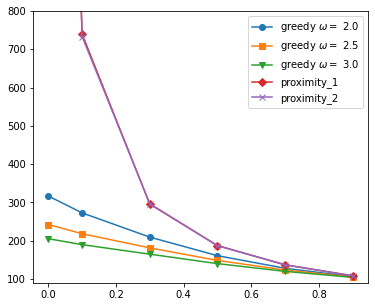

In [15]:
plot_many_distances(data = plot_data, 
                    x_values = params[val2_name].unique(), 
                    legend_labels = legend_labels,
                    legend_title = '',
                    ylim = (90,800))

## Plot Levy Greedy Random Walk -> Vary $q_0$ and advantage

In [14]:
sheet_name = "rw_levy_greedy_params_omega"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=sheet_name).sort_values(['q_0','omega'])
params

,type,size,n_rw,advantage,q_0,omega
28,levy_greedy,50,10000,3,0.0,1
0,levy_greedy,50,10000,3,0.0,2
1,levy_greedy,50,10000,3,0.0,3
2,levy_greedy,50,10000,3,0.0,4
29,levy_greedy,50,10000,3,0.0,5


In [13]:
# plot histories_params_p

res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append([arr['mean'], arr['std'], arr['sem']])

#temp_list
data = np.array(temp_list)
data.shape

28


FileNotFoundError: [Errno 2] No such file or directory: 'stuff/results/aco_pp/histories_rw_levy_greedy_params_omega/history_exp_28.npy'

In [61]:
val1_name = 'omega'
val2_name = 'q_0'
temp1 = []
for i in params[val1_name].unique():
    temp2 = []
    for j in params[val2_name].unique():
        temp_df = params[(params[val2_name] == j) & (params[val1_name] == i)]
        row_id = temp_df.index[0]
        temp2.append(data[row_id,0])
    temp1.append(temp2)
    
test_data = np.array(temp1)

min dist: 108.99009644367275
min dist: 104.61721061147175
min dist: 104.27673103504289


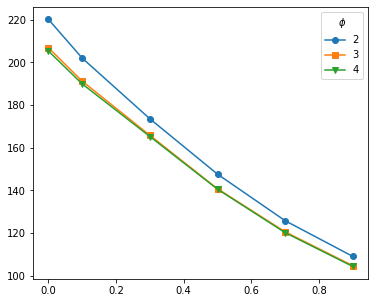

In [62]:
plot_many_distances(data = test_data, 
                    x_values = params[val2_name].unique(), 
                    legend_labels = params[val1_name].unique(),
                    legend_title = r'$\phi$')

In [63]:
# plot histories_params_p

res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append(arr['distances'])

#temp_list
data = np.array(temp_list)
data.shape

#mean, std, sem

(18, 10000)

In [64]:
frames = []

for i in range(len(data)):
    tmp_df = pd.DataFrame(data[i], columns =['distance'])
    tmp_df[val1_name] = params.loc[i][val1_name]
    tmp_df[val2_name] = params.loc[i][val2_name]
    tmp_df.head()
    frames.append(tmp_df)
    
test_df = pd.concat(frames)
test_df.head()

,distance,omega,q_0
0,337.193754,2,0.0
1,194.000000,2,0.0
2,205.062258,2,0.0
3,193.071068,2,0.0
4,209.482279,2,0.0


Text(0, 0.5, '$\\langle x \\rangle$')

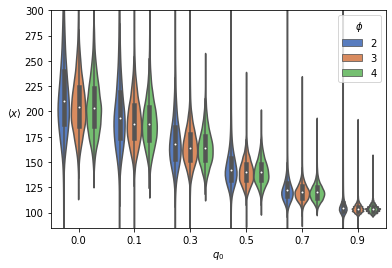

In [65]:
ax = sns.violinplot(x=val2_name, y="distance", hue=val1_name,
                    data=test_df, palette="muted")#, split=True)
ax.set_ylim(85, 300)
ax.set(xlabel=r'$q_0$')
ax.legend(title=r"$\phi$")
ax.set_ylabel(r"$\langle x \rangle$", rotation=0, labelpad=10)

## Plot Levy Proximity Random Walk -> Vary $q_0$ and proximity

In [15]:
sheet_name = "rw_levy_proximity_params_q_0"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=sheet_name).sort_values(['q_0','omega'])
params
#comment

,type,size,n_rw,proximity,q_0,omega
28,levy_proximity,50,10000,proximity_2,0.0,1
0,levy_proximity,50,10000,proximity_2,0.0,2
1,levy_proximity,50,10000,proximity_2,0.0,3
2,levy_proximity,50,10000,proximity_2,0.0,4
29,levy_proximity,50,10000,proximity_2,0.0,5
18,levy_proximity,50,10000,proximity_2,0.1,1
3,levy_proximity,50,10000,proximity_2,0.1,2
4,levy_proximity,50,10000,proximity_2,0.1,3
5,levy_proximity,50,10000,proximity_2,0.1,4
23,levy_proximity,50,10000,proximity_2,0.1,5


In [16]:
# plot histories_params_p

res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append([arr['mean'], arr['std'], arr['sem']])

#temp_list
data = np.array(temp_list)
data.shape

FileNotFoundError: [Errno 2] No such file or directory: 'stuff/results/aco_pp/histories_rw_levy_proximity_params_q_0/history_exp_28.npy'

In [17]:
val1_name = 'proximity'
val2_name = 'omega'
temp1 = []
for i in params[val1_name].unique():
    temp2 = []
    for j in params[val2_name].unique():
        temp_df = params[(params[val2_name] == j) & (params[val1_name] == i)]
        row_id = temp_df.index[0]
        temp2.append(data[row_id,0])
    temp1.append(temp2)
    
test_data = np.array(temp1)

min dist: 187.7221096280845
min dist: 187.5318219043357


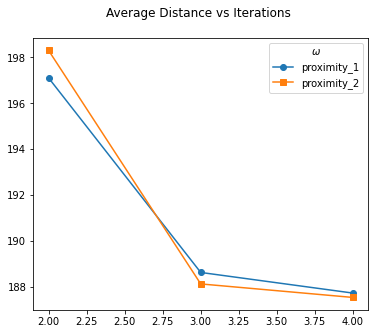

In [18]:
plot_many_distances(data = test_data, 
                    x_values = params[val2_name].unique(), 
                    legend_labels = params[val1_name].unique(),
                    legend_title = r'$\omega$')

In [19]:
# plot histories_params_p

res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append(arr['distances'])

#temp_list
data = np.array(temp_list)
data.shape

#mean, std, sem

(6, 10000)

In [20]:
frames = []

for i in range(len(data)):
    tmp_df = pd.DataFrame(data[i], columns =['distance'])
    tmp_df[val1_name] = params.loc[i][val1_name]
    tmp_df[val2_name] = params.loc[i][val2_name]
    tmp_df.head()
    frames.append(tmp_df)
    
test_df = pd.concat(frames)
test_df.head()

,distance,proximity,omega
0,229.708204,proximity_1,2
1,156.000000,proximity_1,2
2,238.000000,proximity_1,2
3,207.341664,proximity_1,2
4,304.983069,proximity_1,2


Text(0, 0.5, '$\\langle x \\rangle$')

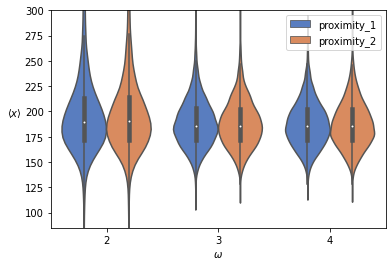

In [21]:
ax = sns.violinplot(x=val2_name, y="distance", hue=val1_name,
                    data=test_df, palette="muted")#, split=True)
ax.set_ylim(85, 300)
ax.set(xlabel=r'$\omega$')
ax.legend(title="")
ax.set_ylabel(r"$\langle x \rangle$", rotation=0, labelpad=10)

## Combination

In [32]:
# plot histories_params_p
sheet_name = "rw_levy_greedy_params_omega"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=sheet_name)
params.head()

res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append([arr['mean'], arr['std'], arr['sem']])

#temp_list
data = np.array(temp_list)
data.shape

#mean, std, sem

(9, 3)

In [33]:
val1_name = 'advantage'
val2_name = 'omega'
temp1 = []
for i in params[val1_name].unique():
    temp2 = []
    for j in params[val2_name].unique():
        temp_df = params[(params[val2_name] == j) & (params[val1_name] == i)]
        row_id = temp_df.index[0]
        temp2.append(data[row_id,0])
    temp1.append(temp2)
    
test_data = np.array(temp1)
test_data

array([[168.48593646, 161.88682256, 160.97399934],
       [156.81792373, 149.27965427, 148.62307319],
       [147.30318799, 141.19269577, 140.41660537]])

In [34]:
legend_labels = [ f"greedy $\omega = $ {i}" for i in params[val1_name].unique()]
legend_labels

['greedy $\\omega = $ 2.0',
 'greedy $\\omega = $ 2.5',
 'greedy $\\omega = $ 3.0']

In [35]:
# plot histories_params_p
sheet_name = "rw_levy_proximity_params_q_0"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=sheet_name)
params.head()

res_dir = os.path.join(RESULTS_DIR, f"histories_{sheet_name}")

temp_list = []
for exp_idx, row in params.iterrows():
    file_name = "history_exp_{}.npy".format(str(exp_idx).zfill(2))
    file_name = os.path.join(res_dir, file_name)
    arr = np.load(file_name, allow_pickle='TRUE').item()
    temp_list.append([arr['mean'], arr['std'], arr['sem']])

#temp_list
data = np.array(temp_list)
data.shape


(6, 3)

In [36]:
val1_name = 'proximity'
val2_name = 'omega'
temp1 = []
for i in params[val1_name].unique():
    temp2 = []
    for j in params[val2_name].unique():
        temp_df = params[(params[val2_name] == j) & (params[val1_name] == i)]
        row_id = temp_df.index[0]
        temp2.append(data[row_id,0])
    temp1.append(temp2)
    
test_data2 = np.array(temp1)
test_data2

array([[197.11191062, 188.62233574, 187.72210963],
       [198.31129037, 188.12185718, 187.5318219 ]])

In [37]:
plot_data = np.concatenate([test_data,test_data2])
plot_data

array([[168.48593646, 161.88682256, 160.97399934],
       [156.81792373, 149.27965427, 148.62307319],
       [147.30318799, 141.19269577, 140.41660537],
       [197.11191062, 188.62233574, 187.72210963],
       [198.31129037, 188.12185718, 187.5318219 ]])

In [38]:
legend_labels = np.concatenate([legend_labels, params[val1_name].unique()])
legend_labels

array(['greedy $\\omega = $ 2.0', 'greedy $\\omega = $ 2.5',
       'greedy $\\omega = $ 3.0', 'proximity_1', 'proximity_2'],
      dtype=object)

min dist: 160.97399934258698
min dist: 148.62307318580014
min dist: 140.41660537040673
min dist: 187.7221096280845
min dist: 187.5318219043357


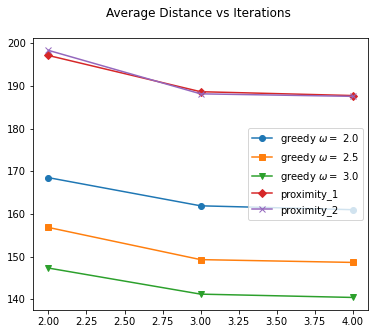

In [40]:
plot_many_distances(data = plot_data, 
                    x_values = params[val2_name].unique(), 
                    legend_labels = legend_labels,
                    legend_title = '')